# **ML 세션 3주차 퀴즈**

## **k-최근접 이웃 회귀**

### **problem1)**
분류와 회귀의 차이점은 무엇인가요?

In [1]:
### 기본 데이터셋 준비

import pandas as pd
from sklearn.datasets import load_diabetes

# 당뇨병 데이터셋 로드
diabetes = load_diabetes()

# 특성과 타깃 변수를 데이터프레임으로 변환
x = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = pd.Series(diabetes.target, name='target')

# x와 y 병합
diabetes_df = pd.concat([x, y], axis=1)

# 병합된 데이터프레임 출력
diabetes_df 

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


# Diabetes 데이터셋 설명 
age: 나이  
sex: 성별  
bmi: 체질량 지수 (Body Mass Index)  
bp: 평균 혈압  
s1: TC (총 콜레스테롤)  
s2: LDL (저밀도 지단백 콜레스테롤)  
s3: HDL (고밀도 지단백 콜레스테롤)  
s4: TCH (총 콜레스테롤과 HDL의 비율)  
s5: LTG (혈청 트리글리세리드)  
s6: GLU (혈당)
target의 의미  
정량적 측정: target은 1년 후의 **당뇨병 진행 정도**를 수치로 나타냅니다.  
값의 범위: target 변수는 대략 **25~346** 사이의 값을 가집니다.  
이 값은 개별 환자의 당뇨병 상태가 시간이 지남에 따라 얼마나 진행되었는지를 나타냅니다.  
정규화된 데이터임에 주의!

In [19]:
# 이상치 제거 함수 정의
def remove_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    # 1.5 * IQR 범위를 벗어난 이상치를 제거
    return df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# 이상치 제거된 데이터프레임 생성
x_clean = remove_outliers(x)

# 이상치 제거 전 데이터 개수
print(f'Original data size: {x.shape[0]}')

# 이상치 제거 후 데이터 개수
print(f'Cleaned data size: {x_clean.shape[0]}')

Original data size: 442
Cleaned data size: 411


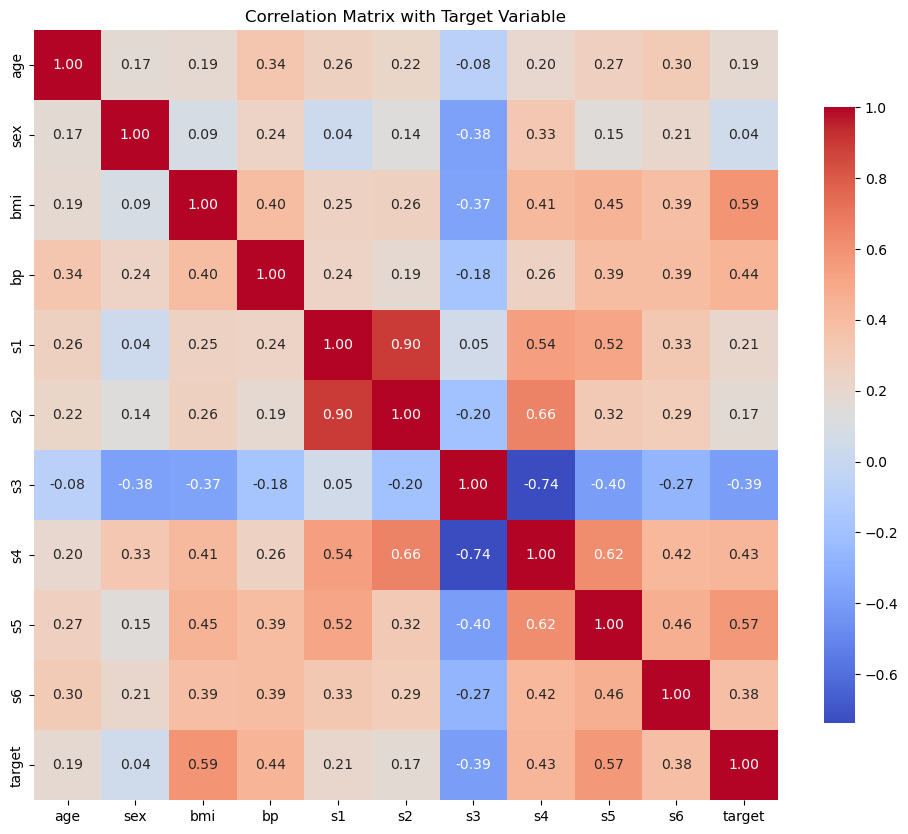

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

#상관관계 분석
 
# 특성 데이터프레임과 타겟 시리즈 결합
combined_data = pd.concat([x, y], axis=1)

# 전체 데이터에 대한 상관관계 분석
correlation_matrix = combined_data.corr()

# 상관관계 행렬 시각화
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'shrink': .8})
plt.title('Correlation Matrix with Target Variable')
plt.show()

### bmi 와 당뇨병 수치간의 상관관계가 높으므로 두 열 선택!

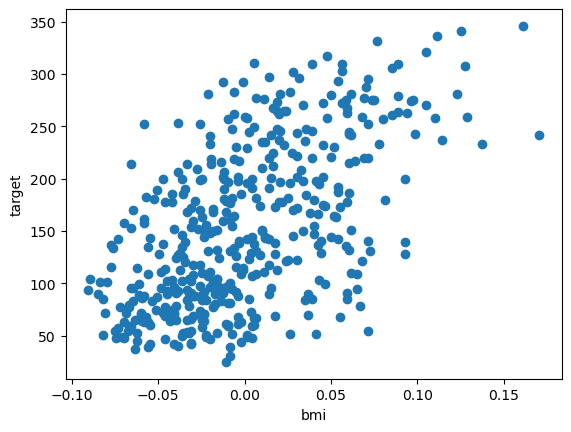

In [21]:
# 산점도 그리기

bmi = diabetes_df['bmi']
target = diabetes_df['target']

plt.scatter(bmi, target)
plt.xlabel('bmi')
plt.ylabel('target')
plt.show()

In [22]:
# 훈련 세트, 테스트 세트 나누기

from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(bmi, target, random_state=42)

print(train_input.shape, test_input.shape)

(331,) (111,)


### **problem2)**
현재 train_input 과 test_input은 1차원 배열이다.  
하지만 사이킷런에 사용할 훈련 세트는 2차원 배열이야 한다.  
밑에 빈 코드를 채우시오.  
힌트) 아직 넘파이 배열로 안바꾼 걸 감안해주세요

In [23]:
import numpy as np

train_input = " "   
test_input = " "

print(train_input.shape, test_input.shape)

(331, 1) (111, 1)


In [24]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()
knr.fit(train_input, train_target)

print(knr.score(test_input, test_target))
print(knr.score(train_input, train_target))

0.24330616814225836
0.4826920342362202


In [25]:
# bmi 수치 0.17 이고 target 값 323인 사람

print(knr.predict([[0.17]]))

[297.4]


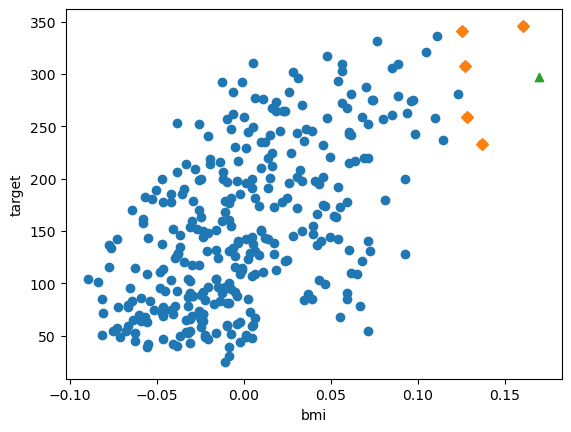

In [26]:
# 이웃 구하기
distances, indexes = knr.kneighbors(np.array([0.17]).reshape(-1, 1))
# 훈련 세트의 산점도
plt.scatter(train_input, train_target)
#이웃 샘플만 다시 그리기
plt.scatter(train_input[indexes], train_target.iloc[indexes.flatten()], marker='D')
# new 사람 데이터
plt.scatter(0.17, 297.4, marker='^')

plt.xlabel('bmi')
plt.ylabel('target')
plt.show()

In [11]:
print(np.mean(train_target.iloc[indexes.flatten()]))

297.4


## **선형 회귀**

### **problem3)**
선형 회귀 모델을 사용하려고 한다.  
어떤 패키지 안에 어떤 모델을 사용해야 하며, train_input 과 train_target을 사용하여 훈련하기까지의 코드를 작성하시오.  

In [27]:
# 선형 회귀

"

                     "

print(lr.predict([[0.17]]))

[317.8736201]


### **problem4)**
선형회귀 클래스가 찾은 기울기와 절편은 lr 객체의 이것과 저것 속성에 저장되어 있다  
기울기와 절편 값을 알아보기 위한 코드를 밑에 완성하시오.  

In [28]:
print(" , ")     # ()안에 값 빈칸

[975.27698313] 152.07653296894014


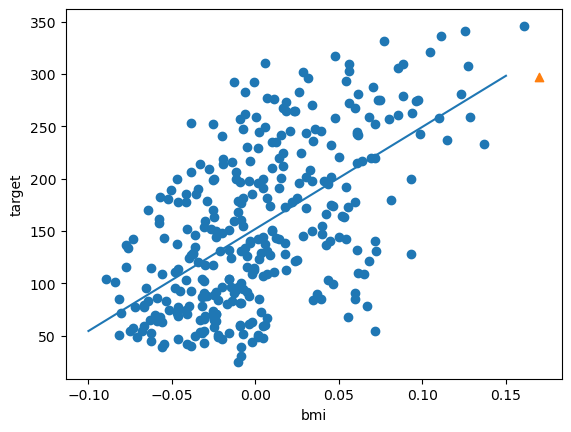

In [30]:
plt.scatter(train_input, train_target)
plt.plot([-0.10, 0.15], [-0.10*lr.coef_ + lr.intercept_, 0.15*lr.coef_ + lr.intercept_])
plt.scatter(0.17, 297.4, marker='^')

plt.xlabel('bmi')
plt.ylabel('target')
plt.show()

## **다중 회귀**

In [31]:
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))
print(train_poly.shape, test_poly.shape)

(331, 2) (111, 2)


In [33]:
train_input

array([[ 0.04229559],
       [-0.05039625],
       [ 0.05522933],
       [ 0.01427248],
       [-0.01159501],
       [-0.0105172 ],
       [-0.00943939],
       [-0.00405033],
       [ 0.01535029],
       [ 0.02397278],
       [-0.0374625 ],
       [-0.03207344],
       [ 0.01858372],
       [-0.01590626],
       [-0.00620595],
       [ 0.00888341],
       [-0.0374625 ],
       [-0.00943939],
       [-0.07734155],
       [-0.00189471],
       [-0.04500719],
       [ 0.04552903],
       [ 0.03259528],
       [ 0.08540807],
       [-0.0105172 ],
       [ 0.11019775],
       [-0.00620595],
       [ 0.00133873],
       [ 0.114509  ],
       [-0.04069594],
       [ 0.01750591],
       [ 0.05954058],
       [-0.046085  ],
       [ 0.04768465],
       [ 0.00564998],
       [-0.03099563],
       [ 0.05415152],
       [-0.00512814],
       [-0.00943939],
       [ 0.0250506 ],
       [ 0.12852056],
       [ 0.01427248],
       [-0.00081689],
       [-0.03099563],
       [ 0.00457217],
       [ 0

In [16]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.predict([[0.17*2, 0.17]]))
print(" , ")         

[615.34647956]
[894.87986618 946.69248208] 150.149603107035


### **problem5)**
위에 a, b, c 값을 사용하여 밑에 이차곡선을 그리기 위한 코드를 작성하시오(소수점 둘째자리 까지 작성)

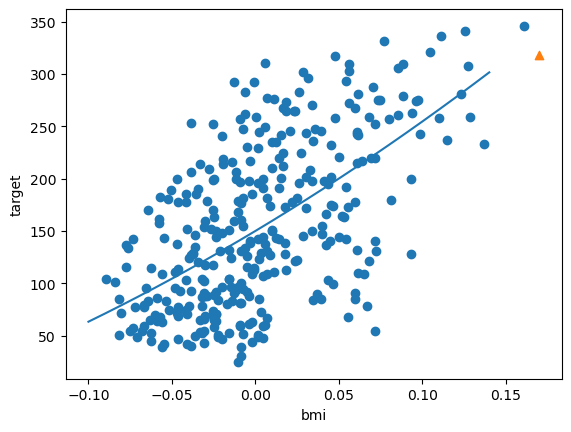

In [35]:
# 데이터 포인트가 많아 배열의 값 사이 간격을 0.01로 조정
point = point = np.arange(-0.10, 0.15, 0.01)

plt.scatter(train_input, train_target)
"   "       
plt.scatter([0.17], [317.8736201], marker='^')

plt.xlabel('bmi')
plt.ylabel('target')
plt.show()

# 라쏘와 릿지
-bmi의 특성만을 다항회귀식과 기존 회귀식에서 R-score가 좋지 못하였기 때문에, 라쏘와 릿지를 활용하여 더 좋은 모델을 만들 것임.


In [2]:
#필요 패키지 임포트
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import matplotlib.pyplot as plt

## **Backward Elimination**이란? 
회귀 분석 및 예측 모델에서 가장 유용한 피처 선택 방법 중 하나입니다.  
이 방법은 모든 독립 변수로 모델을 시작하고, 통계적으로 중요하지 않은 변수들을 하나씩 제거하여 최적의 모델을 찾는 과정입니다. 이 방법은 특히 다중 회귀 분석에서 자주 사용됩니다.  
`statsmodels`는 Python에서 통계적 모델링을 위한 강력한 라이브러리로, 회귀 분석, 시계열 분석, 분산 분석(ANOVA), 일반화 선형 모델(GLM), 서바이벌 분석 등 다양한 통계 모델을 제공

In [4]:
# backward elimination을 진행하여 변수 선정(Exploratory Regression)
x_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
import statsmodels.api as sm
def backward_elimination(X, y, significance_level=0.05):
    variables = X.columns.tolist()
    while len(variables) > 0:
        X_with_vars = X[variables]
        model = sm.OLS(y, X_with_vars).fit()
        max_p_value = model.pvalues.max()
        if max_p_value > significance_level:
            excluded_var = model.pvalues.idxmax()
            print(f'Removing {excluded_var} with p-value {max_p_value}')
            variables.remove(excluded_var)
        else:
            break
    return model

# Backward Elimination 수행
model = backward_elimination(x_train, y_train)

# 최종 모델 요약 출력
print(model.summary())


Removing s3 with p-value 0.9483595140641647
Removing s2 with p-value 0.7220701891975754
Removing age with p-value 0.5312196367121274
Removing s6 with p-value 0.44917291222882083
Removing s4 with p-value 0.2637990645500241
Removing sex with p-value 0.45254580217592644
Removing bp with p-value 0.09823016759684992
Removing s1 with p-value 0.11018893825646282
                                 OLS Regression Results                                
Dep. Variable:                 target   R-squared (uncentered):                   0.115
Model:                            OLS   Adj. R-squared (uncentered):              0.110
Method:                 Least Squares   F-statistic:                              22.79
Date:                Tue, 06 Aug 2024   Prob (F-statistic):                    4.93e-10
Time:                        20:01:34   Log-Likelihood:                         -2297.2
No. Observations:                 353   AIC:                                      4598.
Df Residuals:             

### **problem6)**
위의 결과를 보았을 때, 종속변수(Target)에 통계적으로 유의미한 변수는 어떤 것인가요? x[[]]를 채워주세요

In [5]:
X_backward = x[[]]  # Backward elimination을 통해 얻은 변수 적어주세요 

In [7]:
# 데이터 분할 (훈련 세트와 테스트 세트)
X_train, X_test, y_train, y_test = train_test_split(X_backward, y, test_size=0.2, random_state=42)

# 선형 회귀 모델 생성
model = LinearRegression()

# 모델 학습
model.fit(X_train, y_train)

# 예측
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# 모델 평가
# R^2 계산 
train_r2 = model.score(X_train, y_train)
test_r2 = model.score(X_test, y_test)


# 결과 출력

print("Train score:", train_r2)
print("Test score:", test_r2)

# 회귀 계수 출력
print(model.coef_,model.intercept_) #모델의 성능이 좋아진 것을 확인 할 수 있음.

Train score: 0.4583441422501079
Test score: 0.4522925957397932
[732.10902123 562.22653533] 151.78215201657332


### **problem7)**
위의 결과인 Train score과 Test score을 보았을 때, 규제가 필요한가? 

모델의 성능이 bmi만 독립변수로 선택할 때보다는 좋아졌다.  
그래도 최적의 $R^2$을 만들기 위해 모델의 복잡도를 올리고, 과대적합,과소적합이 발생하면 라쏘 회귀분석과 릿지 분석과 다항 회귀식을 추가하여 해결해보자
### **problem8)** 
다항식의 차수를 지정하는 역할을 PolynomialFeatures의 매개변수는? 

In [8]:
# 특성 공학: 다항식 특성 추가
poly = PolynomialFeatures(' ', include_bias=False)  # ' '에 문제의 정답을 채워주세요  
X_train_poly = poly.fit_transform(X_train)  # 훈련 데이터에 다항식 특성 적용
X_test_poly = poly.transform(X_test)  # 테스트 데이터에 다항식 특성 적용

Degree 1: Train R² = 0.4583, Test R² = 0.4523
Degree 2: Train R² = 0.4656, Test R² = 0.4499
Degree 3: Train R² = 0.4790, Test R² = 0.4568
Degree 4: Train R² = 0.4833, Test R² = 0.4416
Degree 5: Train R² = 0.4918, Test R² = 0.4297
Degree 6: Train R² = 0.4980, Test R² = 0.4196
Degree 7: Train R² = 0.5023, Test R² = 0.4401
Degree 8: Train R² = 0.5159, Test R² = -1.8660
Degree 9: Train R² = 0.5232, Test R² = -5.0043
Degree 10: Train R² = 0.5425, Test R² = -88.8501
Degree 11: Train R² = 0.5326, Test R² = -351.8766
Degree 12: Train R² = 0.5774, Test R² = -3958.2741
Degree 13: Train R² = 0.5167, Test R² = -521.9973
Degree 14: Train R² = 0.5165, Test R² = -493.4234
Degree 15: Train R² = 0.5166, Test R² = -491.2629
Degree 16: Train R² = 0.5166, Test R² = -491.1303
Degree 17: Train R² = 0.5166, Test R² = -491.1247
Degree 18: Train R² = 0.5166, Test R² = -491.1244
Degree 19: Train R² = 0.5166, Test R² = -491.1244
Degree 20: Train R² = 0.5166, Test R² = -491.1244


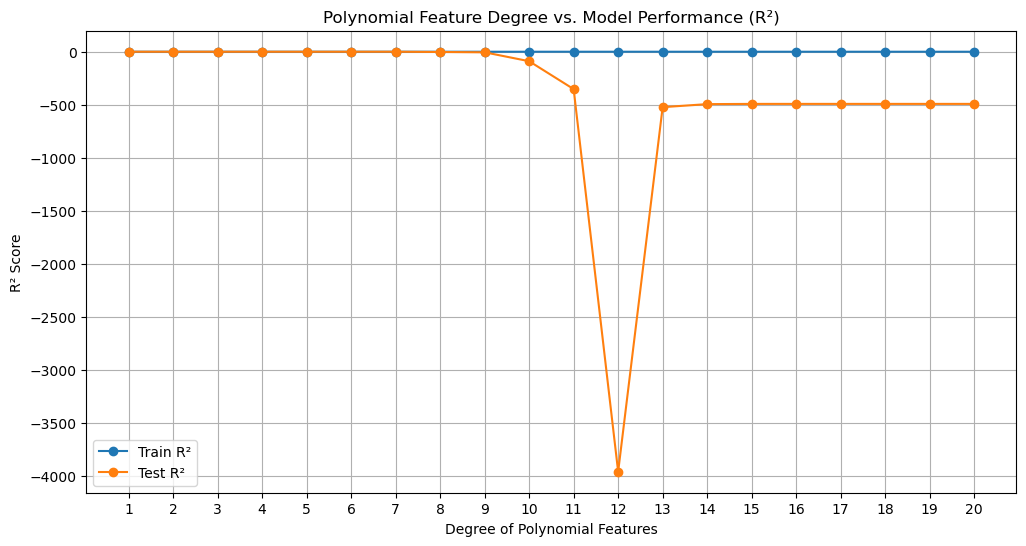

In [15]:
# 모델 성능 기록을 위한 리스트
train_scores = []
test_scores = []

# degree를 1부터 20까지 변화시키면서 다항식 특성 추가
for degree in range(1, 21):
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # 모델 평가 
    train_r2 = model.score(X_train_poly, y_train)
    test_r2 = model.score(X_test_poly, y_test)
    train_scores.append(train_r2)
    test_scores.append(test_r2)
    print(f"Degree {degree}: Train R² = {train_r2:.4f}, Test R² = {test_r2:.4f}")
# 모델 성능 시각화
plt.figure(figsize=(12, 6))
plt.plot(range(1, 21), train_scores, label='Train R²', marker='o')
plt.plot(range(1, 21), test_scores, label='Test R²', marker='o')
plt.xticks(range(1, 21))
plt.xlabel('Degree of Polynomial Features')
plt.ylabel('R² Score')
plt.title('Polynomial Feature Degree vs. Model Performance (R²)')
plt.legend()
plt.grid(True)
plt.show()

### - 위의 시각화 결과를 보면, Degree가 8이상부터 overfitting이 발생함을 알 수 있다. 따라서, degree가 8이상인 경우를 라쏘와, 릿지 규제를 할 것이다. 
degree를 변화시켜, 릿지와 라쏘 모델 $R^2$ 평가해보기 

In [19]:
# degree에 따른 점수 저장 리스트 
ridge_train_scores = []
ridge_test_scores = []
lasso_train_scores = []
lasso_test_scores = []

### **problem9)**
다음 코드에서 데이터 스케일링 부분에서 `fit_transform`을 두줄의 코드로 바꾸면? 

In [20]:
# degree를 8부터 20까지 변화시키면서 성능 평가
for degree in range(8, 21):
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    # 데이터 스케일링
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_poly) 
    X_test_scaled = scaler.transform(X_test_poly)
    
    # 릿지 회귀 모델 훈련 및 평가
    ridge = Ridge()
    ridge.fit(X_train_scaled, y_train)
    ridge_train_scores.append(ridge.score(X_train_scaled, y_train))
    ridge_test_scores.append(ridge.score(X_test_scaled, y_test))
    
    # 라쏘 회귀 모델 훈련 및 평가
    lasso = Lasso(max_iter=10000)
    lasso.fit(X_train_scaled, y_train)
    lasso_train_scores.append(lasso.score(X_train_scaled, y_train))
    lasso_test_scores.append(lasso.score(X_test_scaled, y_test))


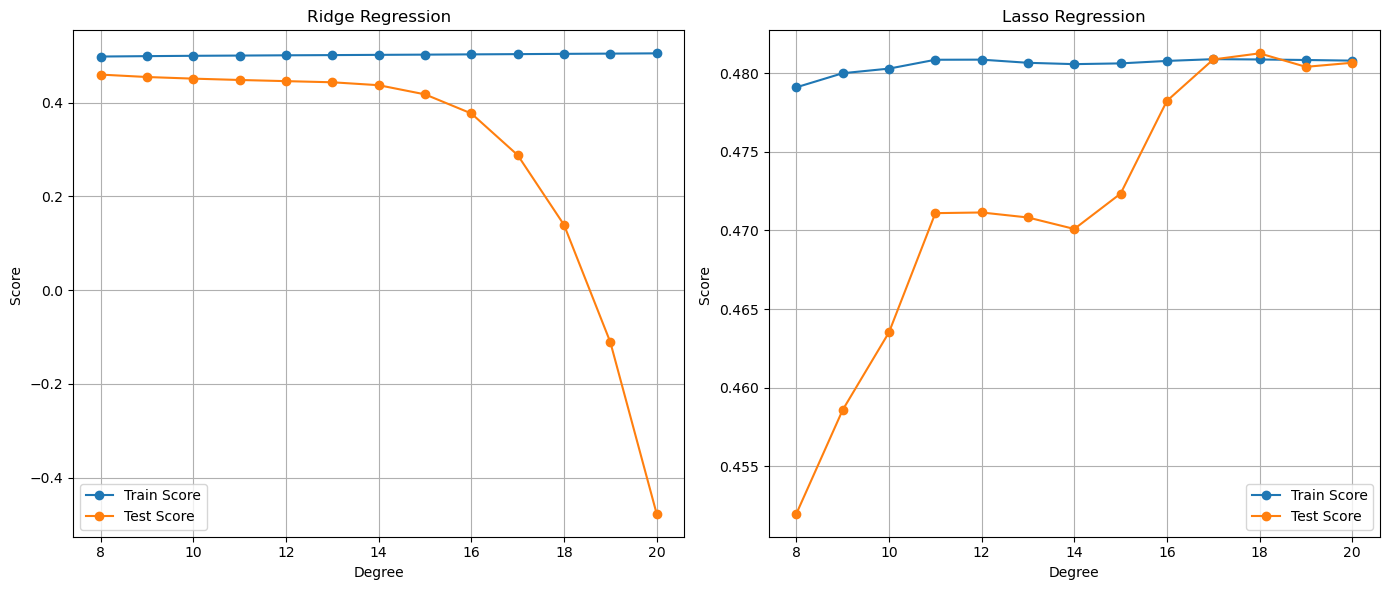

In [22]:
#릿지 회귀 결과 시각화
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(range(8, 21), ridge_train_scores, label='Train Score', marker='o')
plt.plot(range(8, 21), ridge_test_scores, label='Test Score', marker='o')
plt.xlabel('Degree')
plt.ylabel('Score ')
plt.title('Ridge Regression')
plt.legend()
plt.grid(True)
plt.xticks(range(8, 21, 2))

# 라쏘 회귀 결과 시각화
plt.subplot(1, 2, 2)
plt.plot(range(8, 21), lasso_train_scores, label='Train Score',  marker='o')
plt.plot(range(8, 21), lasso_test_scores, label='Test Score',  marker='o')
plt.xlabel('Degree')
plt.ylabel('Score ')
plt.title('Lasso Regression')
plt.legend()
plt.grid(True)
plt.xticks(range(8, 21, 2))

plt.tight_layout()
plt.show()



## 라쏘, 릿지 모델에 최적의 Alpha 대입한 후 시각화 
`GridSearchCV`을 활용한 최적의 Alpha 값 찾기   
GridSearchCV는 머신러닝 모델의 하이퍼파라미터를 자동으로 탐색하여 최적의 값을 찾는 데 매우 유용한 도구임


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.014e+05, tolerance: 1.706e+02
  model = cd_fast.enet_coordinate_descent(
c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.647e+05, tolerance: 1.758e+02
  model = cd_fast.enet_coordinate_descent(
c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.945e+05, tolerance: 

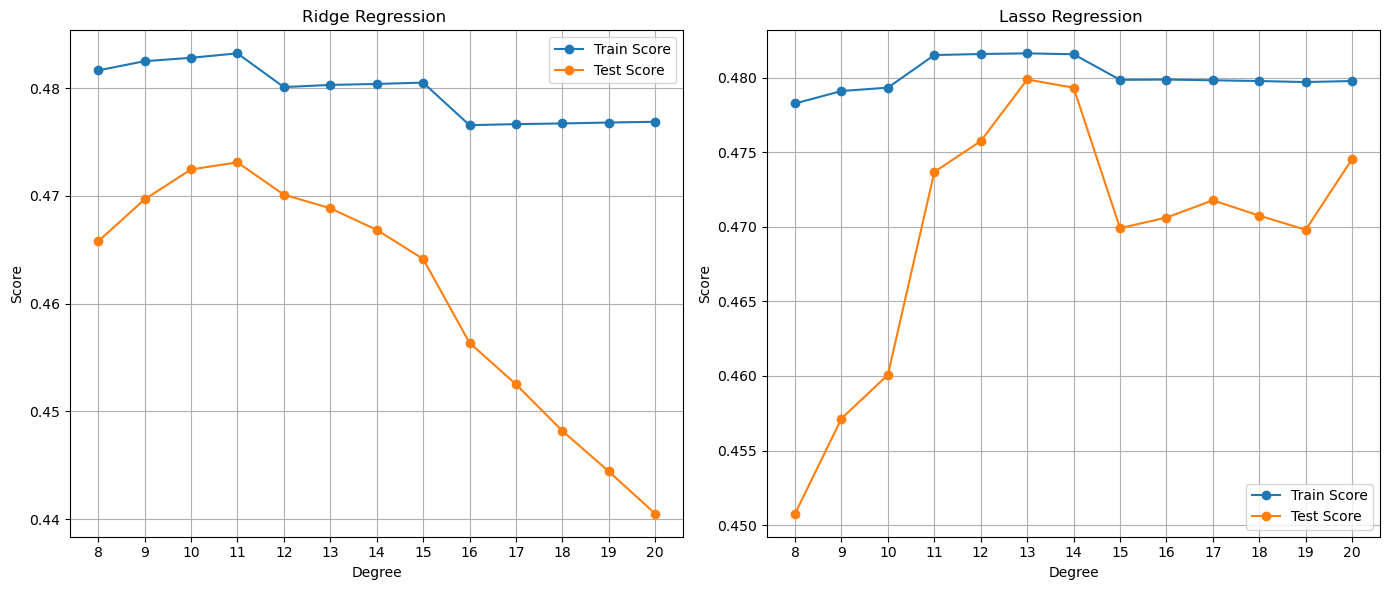

Degree 8: Alpha = 33.9322177189533, Alpha = 1.151395399326447
Degree 9: Alpha = 33.9322177189533, Alpha = 1.151395399326447
Degree 10: Alpha = 33.9322177189533, Alpha = 1.151395399326447
Degree 11: Alpha = 33.9322177189533, Alpha = 0.868511373751352
Degree 12: Alpha = 44.98432668969444, Alpha = 0.868511373751352
Degree 13: Alpha = 44.98432668969444, Alpha = 0.868511373751352
Degree 14: Alpha = 44.98432668969444, Alpha = 0.868511373751352
Degree 15: Alpha = 44.98432668969444, Alpha = 1.151395399326447
Degree 16: Alpha = 59.636233165946365, Alpha = 1.151395399326447
Degree 17: Alpha = 59.636233165946365, Alpha = 1.151395399326447
Degree 18: Alpha = 59.636233165946365, Alpha = 1.151395399326447
Degree 19: Alpha = 59.636233165946365, Alpha = 1.151395399326447
Degree 20: Alpha = 59.636233165946365, Alpha = 1.151395399326447


In [23]:
# 최적의 alpha 값을 저장할 리스트 초기화
best_ridge_alphas = []
best_lasso_alphas = []

# 릿지 및 라쏘 점수 리스트 초기화
ridge_train_scores = []
ridge_test_scores = []
lasso_train_scores = []
lasso_test_scores = []

# degree를 8부터 21까지 변화시키면서 성능 평가
degrees = range(8, 21)
for degree in degrees:
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    # 데이터 정규화
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_poly)
    X_test_scaled = scaler.transform(X_test_poly)
    
    # 릿지 회귀 최적의 alpha 찾기
    ridge = Ridge()
    ridge_params = {'alpha': np.logspace(-3, 3, 50)}
    ridge_grid = GridSearchCV(ridge, ridge_params, cv=5, scoring='r2')
    ridge_grid.fit(X_train_scaled, y_train)
    best_ridge_alpha = ridge_grid.best_params_['alpha']
    best_ridge_alphas.append(best_ridge_alpha)
    ridge_best = Ridge(alpha=best_ridge_alpha)
    ridge_best.fit(X_train_scaled, y_train)
    ridge_train_scores.append(ridge_best.score(X_train_scaled, y_train))
    ridge_test_scores.append(ridge_best.score(X_test_scaled, y_test))
    
    # 라쏘 회귀 최적의 alpha 찾기
    lasso = Lasso(max_iter=10000)
    lasso_params = {'alpha': np.logspace(-3, 3, 50)}
    lasso_grid = GridSearchCV(lasso, lasso_params, cv=5, scoring='r2')
    lasso_grid.fit(X_train_scaled, y_train)
    best_lasso_alpha = lasso_grid.best_params_['alpha']
    best_lasso_alphas.append(best_lasso_alpha)
    lasso_best = Lasso(alpha=best_lasso_alpha, max_iter=10000)
    lasso_best.fit(X_train_scaled, y_train)
    lasso_train_scores.append(lasso_best.score(X_train_scaled, y_train))
    lasso_test_scores.append(lasso_best.score(X_test_scaled, y_test))

# 릿지 회귀 결과 시각화
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(degrees, ridge_train_scores, label='Train Score', marker='o')
plt.plot(degrees, ridge_test_scores, label='Test Score', marker='o')
plt.xticks(degrees)  
plt.xlabel('Degree')
plt.ylabel('Score')
plt.title('Ridge Regression ')
plt.legend()
plt.grid(True)

# 라쏘 회귀 결과 시각화
plt.subplot(1, 2, 2)
plt.plot(degrees, lasso_train_scores, label='Train Score', marker='o')
plt.plot(degrees, lasso_test_scores, label='Test Score', marker='o')
plt.xticks(degrees)  
plt.xlabel('Degree')
plt.ylabel('Score')
plt.title('Lasso Regression ')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# 최적의 alpha 값 출력
for i, degree in enumerate(degrees):
    print(f"Degree {degree}: Alpha = {best_ridge_alphas[i]}, Alpha = {best_lasso_alphas[i]}")

c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.014e+05, tolerance: 1.706e+02
  model = cd_fast.enet_coordinate_descent(
c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.647e+05, tolerance: 1.758e+02
  model = cd_fast.enet_coordinate_descent(
c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.945e+05, tolerance: 

Degree 8:
  Ridge - Best alpha: 33.9322, Train R² = 0.4816, Test R² = 0.4658
  Lasso - Best alpha: 1.1514, Train R² = 0.4783, Test R² = 0.4508
Degree 9:
  Ridge - Best alpha: 33.9322, Train R² = 0.4825, Test R² = 0.4697
  Lasso - Best alpha: 1.1514, Train R² = 0.4791, Test R² = 0.4571
Degree 10:
  Ridge - Best alpha: 33.9322, Train R² = 0.4828, Test R² = 0.4725
  Lasso - Best alpha: 1.1514, Train R² = 0.4793, Test R² = 0.4601
Degree 11:
  Ridge - Best alpha: 33.9322, Train R² = 0.4832, Test R² = 0.4731
  Lasso - Best alpha: 0.8685, Train R² = 0.4815, Test R² = 0.4737
Degree 12:
  Ridge - Best alpha: 44.9843, Train R² = 0.4801, Test R² = 0.4701
  Lasso - Best alpha: 0.8685, Train R² = 0.4816, Test R² = 0.4757
Degree 13:
  Ridge - Best alpha: 44.9843, Train R² = 0.4803, Test R² = 0.4689
  Lasso - Best alpha: 0.8685, Train R² = 0.4816, Test R² = 0.4799
Degree 14:
  Ridge - Best alpha: 44.9843, Train R² = 0.4804, Test R² = 0.4669
  Lasso - Best alpha: 0.8685, Train R² = 0.4816, Test R² = 0

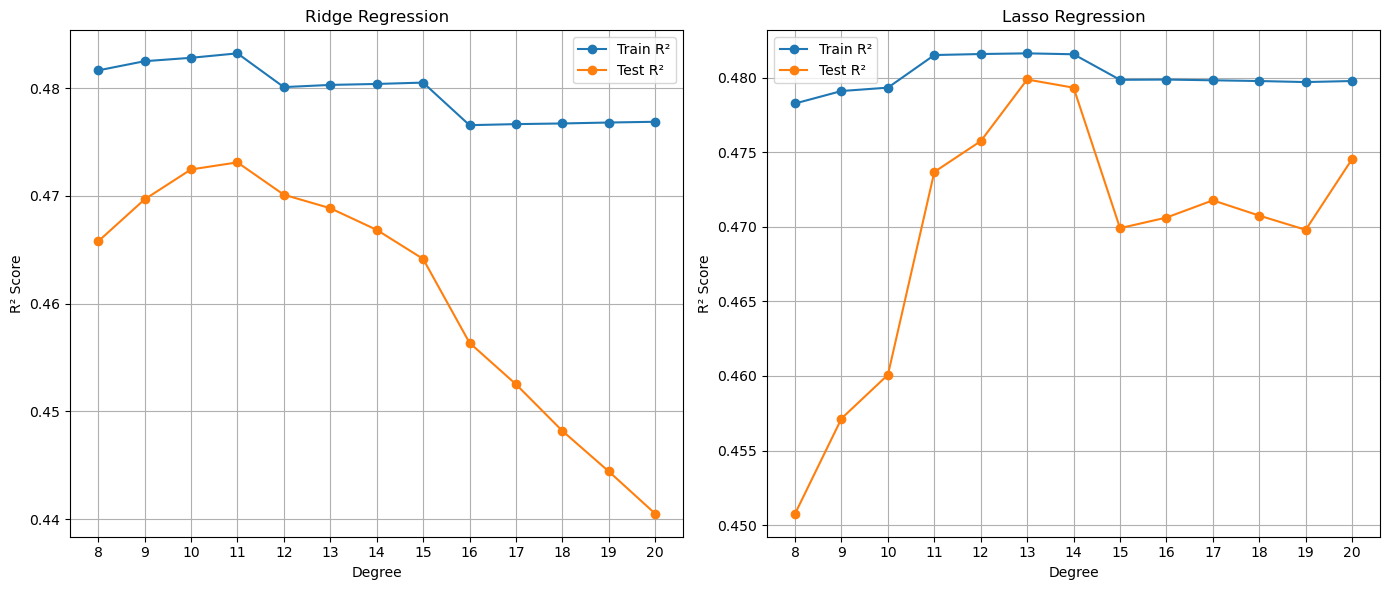

In [30]:
# 최적의 alpha 값을 저장할 리스트 초기화
best_ridge_alphas = []
best_lasso_alphas = []

# 릿지 및 라쏘 점수 리스트 초기화
ridge_train_scores = []
ridge_test_scores = []
lasso_train_scores = []
lasso_test_scores = []

# 결과 저장용 리스트
results = []

# degree를 8부터 21까지 변화시키면서 성능 평가
degrees = range(8, 21)
for degree in degrees:
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    # 데이터 정규화
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_poly)
    X_test_scaled = scaler.transform(X_test_poly)
    
    # 릿지 회귀 최적의 alpha 찾기
    ridge = Ridge()
    ridge_params = {'alpha': np.logspace(-3, 3, 50)}
    ridge_grid = GridSearchCV(ridge, ridge_params, cv=5, scoring='r2')
    ridge_grid.fit(X_train_scaled, y_train)
    best_ridge_alpha = ridge_grid.best_params_['alpha']
    best_ridge_alphas.append(best_ridge_alpha)
    ridge_best = Ridge(alpha=best_ridge_alpha)
    ridge_best.fit(X_train_scaled, y_train)
    ridge_train_score = ridge_best.score(X_train_scaled, y_train)
    ridge_test_score = ridge_best.score(X_test_scaled, y_test)
    ridge_train_scores.append(ridge_train_score)
    ridge_test_scores.append(ridge_test_score)
    
    # 라쏘 회귀 최적의 alpha 찾기
    lasso = Lasso(max_iter=10000)
    lasso_params = {'alpha': np.logspace(-3, 3, 50)}
    lasso_grid = GridSearchCV(lasso, lasso_params, cv=5, scoring='r2')
    lasso_grid.fit(X_train_scaled, y_train)
    best_lasso_alpha = lasso_grid.best_params_['alpha']
    best_lasso_alphas.append(best_lasso_alpha)
    lasso_best = Lasso(alpha=best_lasso_alpha, max_iter=10000)
    lasso_best.fit(X_train_scaled, y_train)
    lasso_train_score = lasso_best.score(X_train_scaled, y_train)
    lasso_test_score = lasso_best.score(X_test_scaled, y_test)
    lasso_train_scores.append(lasso_train_score)
    lasso_test_scores.append(lasso_test_score)
    
    # 결과 저장
    results.append({
        'degree': degree,
        'ridge_alpha': best_ridge_alpha,
        'ridge_train_r2': ridge_train_score,
        'ridge_test_r2': ridge_test_score,
        'lasso_alpha': best_lasso_alpha,
        'lasso_train_r2': lasso_train_score,
        'lasso_test_r2': lasso_test_score
    })

# 결과 출력
for result in results:
    print(f"Degree {result['degree']}:")
    print(f"  Ridge - Best alpha: {result['ridge_alpha']:.4f}, Train R² = {result['ridge_train_r2']:.4f}, Test R² = {result['ridge_test_r2']:.4f}")
    print(f"  Lasso - Best alpha: {result['lasso_alpha']:.4f}, Train R² = {result['lasso_train_r2']:.4f}, Test R² = {result['lasso_test_r2']:.4f}")

# 릿지 회귀 결과 시각화
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(degrees, ridge_train_scores, label='Train R²', marker='o')
plt.plot(degrees, ridge_test_scores, label='Test R²', marker='o')
plt.xticks(degrees)  
plt.xlabel('Degree')
plt.ylabel('R² Score')
plt.title('Ridge Regression')
plt.legend()
plt.grid(True)

# 라쏘 회귀 결과 시각화
plt.subplot(1, 2, 2)
plt.plot(degrees, lasso_train_scores, label='Train R²', marker='o')
plt.plot(degrees, lasso_test_scores, label='Test R²', marker='o')
plt.xticks(degrees)  
plt.xlabel('Degree')
plt.ylabel('R² Score')
plt.title('Lasso Regression')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# 최종 결과 
## **problem10)**
위의 코드의 결과를 봤을 때 , degree=**?** 이면서 lass, Ridge중 어떤 모델을 선택할 것인가? 